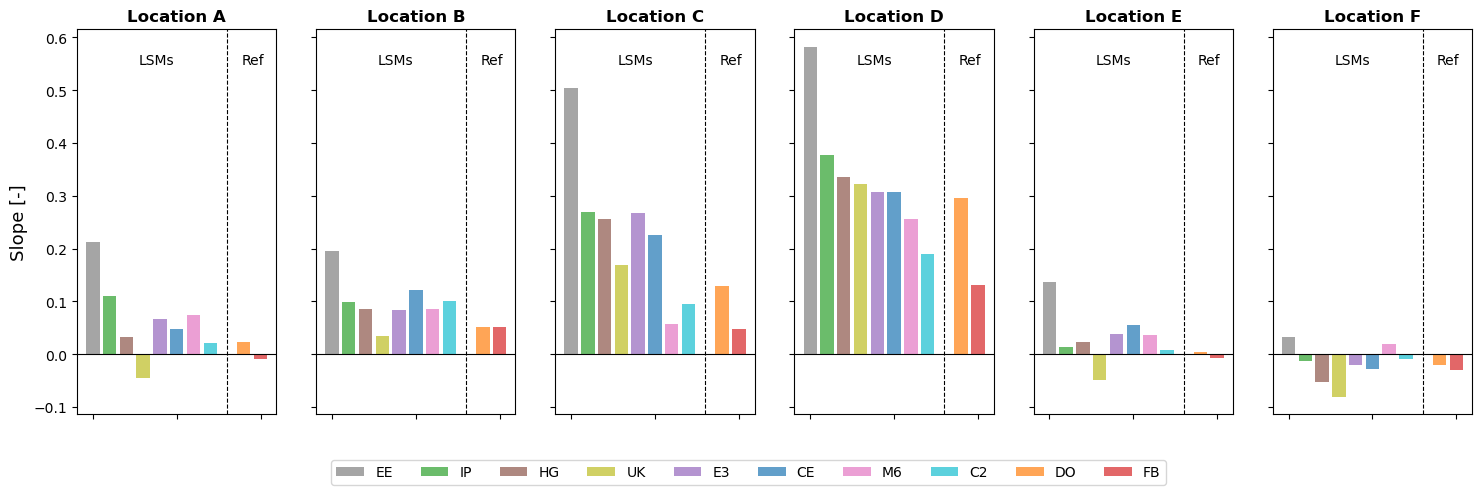

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

label = ['EE', 'IP', 'HG' , 'UK' , 'E3' , 'CE' , 'M6' , 'C2' , 'DO' , 'FB']
color = ['C7', 'C2', 'C5' , 'C8' , 'C4' , 'C10', 'C6' , 'C9' , 'C1' , 'C3']

# LSMs
data = np.zeros((11 , 6))
data[3] = [-0.045 , 0.035 , 0.169 , 0.323 , -0.048 , -0.081]  #UK
data[2] = [0.032 , 0.085 , 0.257 , 0.336 , 0.023 , -0.052] #HG
data[7] = [0.022 , 0.1 , 0.095 , 0.190 , 0.008 , -0.009] #C2
data[5] = [0.048 , 0.121 , 0.225 , 0.307 , 0.056 , -0.028] #CE
data[4] = [0.067 , 0.083 , 0.267 , 0.308 , 0.039 , -0.021] #E3
data[0] = [0.213 , 0.195 , 0.504 , 0.582 , 0.137 , 0.032] # EE
data[1] = [0.111 , 0.098 , 0.270 , 0.377 , 0.014 , -0.013] #IP
data[6] = [0.075 , 0.086 , 0.057 , 0.256 , 0.036 , 0.019] #M6

#Ref E
data[9] = [0.023 , 0.052 , 0.129 , 0.296 , 0.004 , -0.021]
data[10] = [-0.009 , 0.051 , 0.048 , 0.132 , -0.007 , -0.030]

loc = ['A' , 'B' , 'C' , 'D' , 'E' , 'F']

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Iterate over the models and plot a bar chart for each location
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([0 , 1 , 2, 3 , 4 , 5 , 6 , 7 , 9 , 10] , np.arange(0 , 10 , 1)):
        axs[i]
        axs[i].bar(k, data[:, j][k], alpha=0.7 , color = color[l] , label= label[l])
        axs[i].set_title(f"Location {loc[i]}" , fontweight = 'bold')
    

    
plt.legend(ncols = 10, bbox_to_anchor=(-0.5 , -0.1))

# Set axis labels and a common y-axis label
#for ax in axs:
    #ax.set_xlabel("Model")
    
for ax in axs:
    ax.axvline(x=8, color='black', linestyle='--' , linewidth = 0.8)
    ax.axhline(y=0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    ax.text(2.75 , 0.55,  'LSMs')
    ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

# Add a main title to the figure
#fig.suptitle("E/P anomaly response", fontsize=16)

# Display the plot
plt.show()

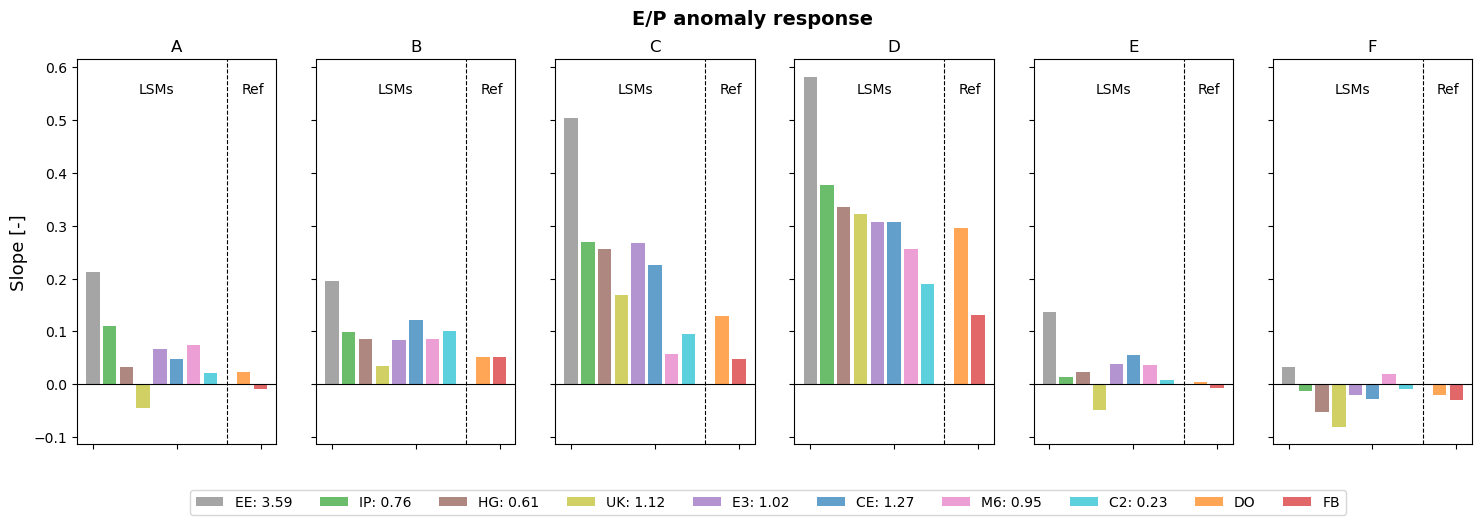

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#label = ['EE', 'IP', 'HG' , 'UK' , 'E3' , 'CE' , 'M6' , 'C2' , 'DO' , 'FB']
color = ['C7', 'C2', 'C5' , 'C8' , 'C4' , 'C10', 'C6' , 'C9' , 'C1' , 'C3']



# LSMs
data = np.zeros((11 , 6))
data[3] = [-0.045 , 0.035 , 0.169 , 0.323 , -0.048 , -0.081]  #UK
data[2] = [0.032 , 0.085 , 0.257 , 0.336 , 0.023 , -0.052] #HG
data[7] = [0.022 , 0.1 , 0.095 , 0.190 , 0.008 , -0.009] #C2
data[5] = [0.048 , 0.121 , 0.225 , 0.307 , 0.056 , -0.028] #CE
data[4] = [0.067 , 0.083 , 0.267 , 0.308 , 0.039 , -0.021] #E3
data[0] = [0.213 , 0.195 , 0.504 , 0.582 , 0.137 , 0.032] # EE
data[1] = [0.111 , 0.098 , 0.270 , 0.377 , 0.014 , -0.013] #IP
data[6] = [0.075 , 0.086 , 0.057 , 0.256 , 0.036 , 0.019] #M6

#Ref E
data[9] = [0.023 , 0.052 , 0.129 , 0.296 , 0.004 , -0.021]
data[10] = [-0.009 , 0.051 , 0.048 , 0.132 , -0.007 , -0.030]

avg_Ref = [(data[9][0] + data[10][0])/2 , (data[9][1] + data[10][1])/2 , (data[9][2] + data[10][2])/2 , (data[9][3] + data[10][3])/2 , (data[9][4] + data[10][4])/2 , (data[9][5] + data[10][5])/2]

MAE = np.zeros((8 , 6)) #Mean relative error

for i in range(8):
    for j in range(6):
        MAE[i][j] = abs((abs(data[i][j]) - abs(avg_Ref[j]))/(abs(avg_Ref[j]))) * 1/6

loc = ['A' , 'B' , 'C' , 'D' , 'E' , 'F']
label = [f'EE: {np.sum(MAE[0])/6:.2f}', f'IP: {np.sum(MAE[1])/6:.2f}', f'HG: {np.sum(MAE[2])/6:.2f}' , 
         f'UK: {np.sum(MAE[3])/6:.2f}' , f'E3: {np.sum(MAE[4])/6:.2f}' , f'CE: {np.sum(MAE[5])/6:.2f}' , 
         f'M6: {np.sum(MAE[6])/6:.2f}' , f'C2: {np.sum(MAE[7])/6:.2f}' , 'DO' , 'FB']

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Iterate over the models and plot a bar chart for each location
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([0 , 1 , 2, 3 , 4 , 5 , 6 , 7 , 9 , 10] , np.arange(0 , 10 , 1)):
        axs[i]
        axs[i].bar(k, data[:, j][k], alpha=0.7 , color = color[l] , label= label[l])
        axs[i].set_title(f"{loc[i]}")
    

    
plt.legend(ncols = 10, bbox_to_anchor=(0.4 , -0.1))


for ax in axs:
    ax.axvline(x=8, color='black', linestyle='--' , linewidth = 0.8)
    ax.axhline(y=0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    ax.text(2.75 , 0.55,  'LSMs')
    ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

fig.suptitle("E/P anomaly response", fontsize=14 , fontweight = 'bold')

plt.show()

In [3]:
#checking standard deviation from various products

home = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/anomaly_data/2001-2010/Regions/'

SD_DOLCE_v3_CU = xr.open_dataset(home + 'E_DOLCE_v3_monthly_2001_2010_ia_anomalies_CU2.nc', engine = 'netcdf4')
SD_ERA_5_CU = xr.open_dataset(home + 'E_ERA5_land_monthly_2001_2010_ia_anomalies_CU.nc', engine = 'netcdf4')
SD_FLUXCOM_CU = xr.open_dataset(home + 'E_FLUXCOM_RS_monthly_2001_2010_ia_anomalies_CU.nc', engine = 'netcdf4')
SD_GLEAM_CU = xr.open_dataset(home + 'E_GLEAM_monthly_2001_2010_mm_ia_anomalies_CU.nc')


#processing the data

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds

factor_LH = (t_day * 1000)/(rho_w * labda) #factor LH to E
factor_LE = (625 / 54)*(t_day * 1000)/(rho_w * labda) #factor LE to E

E_an_DOLCE = SD_DOLCE_v3_CU.hfls * factor_LH  #Transforming to mm/d
E_an_ERA5 = SD_ERA_5_CU.e * 1000 #Transforming to mm/d
E_an_FLUXCOM = SD_FLUXCOM_CU.LE * factor_LE #Transforming to mm/d
E_an_GLEAM = SD_GLEAM_CU.E # mm/d

labels = ['DOLCE-v3' , 'ERA5    ' , 'FLUXCOM ' , 'GLEAM   ']

print('----' * 20)
print('Central US: standard deviations of the E anomalies')
print('----' * 20)

for model,label in zip([E_an_DOLCE , E_an_ERA5 , E_an_FLUXCOM , E_an_GLEAM] , labels):
    print(f'{label}: {float(np.std(model)):.2f}')

--------------------------------------------------------------------------------
Central US: standard deviations of the E anomalies
--------------------------------------------------------------------------------
DOLCE-v3: 0.29
ERA5    : 0.30
FLUXCOM : 0.18
GLEAM   : 0.31


/home/pdenblaauwen/miniconda3/envs/ewatercycle/lib/python3.10/site-packages/xarray/coding/times.py:688: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [4]:
#checking standard deviation from various products

home = '/scratch/pdenblaauwen/rootzone/rootzone/Benchmark_evaporation_products/anomaly_data/2001-2010/Regions/'

SD_DOLCE_v3_CU = xr.open_dataset(home + 'E_DOLCE_v3_monthly_2001_2010_ia_anomalies_EB.nc', engine = 'netcdf4')
SD_ERA_5_CU = xr.open_dataset(home + 'E_ERA5_land_monthly_2001_2010_ia_anomalies_EB.nc', engine = 'netcdf4')
SD_FLUXCOM_CU = xr.open_dataset(home + 'E_FLUXCOM_RS_monthly_2001_2010_ia_anomalies_EB.nc', engine = 'netcdf4')
SD_GLEAM_CU = xr.open_dataset(home + 'E_GLEAM_monthly_2001_2010_mm_ia_anomalies_EB.nc')


#processing the data

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds

factor_LH = (t_day * 1000)/(rho_w * labda) #factor LH to E
factor_LE = (625 / 54)*(t_day * 1000)/(rho_w * labda) #factor LE to E

E_an_DOLCE = SD_DOLCE_v3_CU.hfls * factor_LH  #Transforming to mm/d
E_an_ERA5 = SD_ERA_5_CU.e * 1000 #Transforming to mm/d
E_an_FLUXCOM = SD_FLUXCOM_CU.LE * factor_LE #Transforming to mm/d
E_an_GLEAM = SD_GLEAM_CU.E # mm/d

labels = ['DOLCE-v3' , 'ERA5    ' , 'FLUXCOM ' , 'GLEAM   ']

print('----' * 20)
print('East Brazil: standard deviations of the E anomalies')
print('----' * 20)

for model,label in zip([E_an_DOLCE , E_an_ERA5 , E_an_FLUXCOM , E_an_GLEAM] , labels):
    print(f'{label}: {float(np.std(model)):.2f}')

--------------------------------------------------------------------------------
East Brazil: standard deviations of the E anomalies
--------------------------------------------------------------------------------
DOLCE-v3: 0.36
ERA5    : 0.32
FLUXCOM : 0.16
GLEAM   : 0.43


/home/pdenblaauwen/miniconda3/envs/ewatercycle/lib/python3.10/site-packages/xarray/coding/times.py:688: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [5]:
"""Run-off"""

'Run-off'

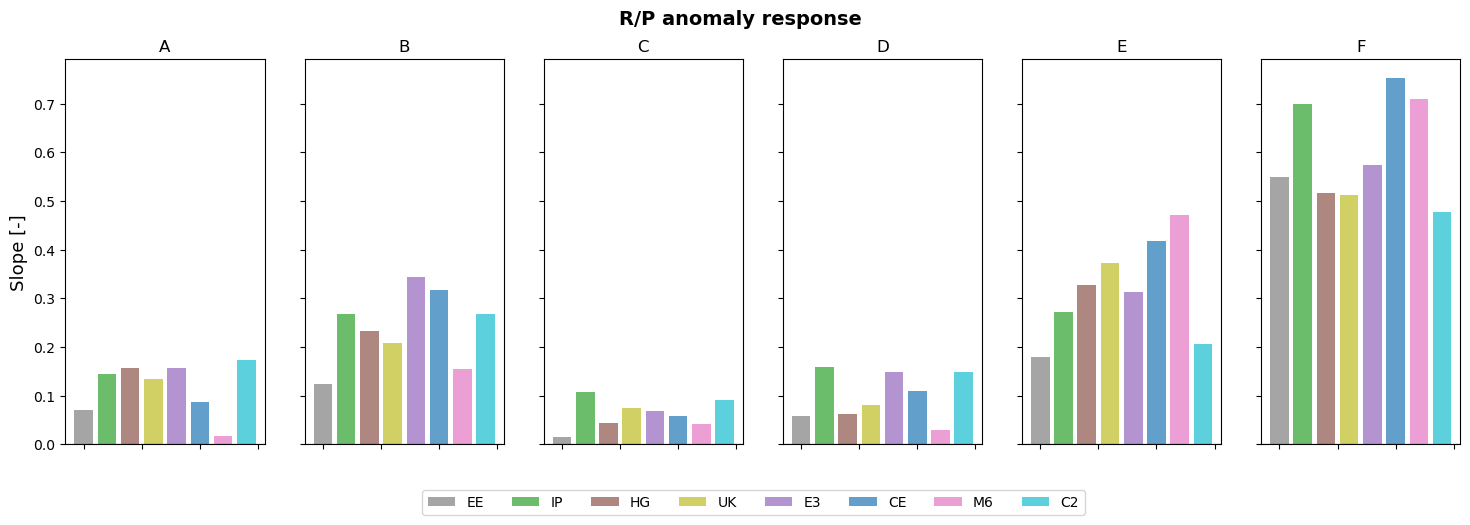

In [6]:
label = ['EE', 'IP', 'HG' , 'UK' , 'E3' , 'CE' , 'M6' , 'C2']
color = ['C7', 'C2', 'C5' , 'C8' , 'C4' , 'C10', 'C6' , 'C9']

# LSMs
data = np.zeros((11 , 6))
data[3] = [0.135 , 0.208 , 0.074 , 0.080 , 0.372 , 0.512]  #UK
data[2] = [0.158 , 0.234 , 0.045 , 0.063 , 0.327 , 0.517] #HG
data[7] = [0.173 , 0.267 , 0.091 , 0.148 , 0.206 , 0.477] #C2
data[5] = [0.088 , 0.317 , 0.059 , 0.110 , 0.417 , 0.753] #CE
data[4] = [0.158 , 0.343 , 0.069 , 0.149 , 0.313 , 0.574] #E3
data[0] = [0.071 , 0.125 , 0.016 , 0.058 , 0.180 , 0.549] # EE
data[1] = [0.144 , 0.267 , 0.107 , 0.159 , 0.272 , 0.699] #IP
data[6] = [0.017 , 0.155 , 0.042 , 0.029 , 0.472 , 0.710] #M6

loc = ['A' , 'B' , 'C' , 'D' , 'E' , 'F']

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Iterate over the models and plot a bar chart for each location
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([0 , 1 , 2, 3 , 4 , 5 , 6 , 7] , np.arange(0 , 8 , 1)):
        axs[i]
        axs[i].bar(k, data[:, j][k], alpha=0.7 , color = color[l] , label= label[l])
        axs[i].set_title(f"{loc[i]}")
    

    
plt.legend(ncols = 8 ,  bbox_to_anchor=(-0.85 , -0.1))

# Set axis labels and a common y-axis label
#for ax in axs:
    #ax.set_xlabel("Model")
    
for ax in axs:
    ax.axhline(y=0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    #ax.text(2.75 , 0.55,  'LSMs')
    #ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

fig.suptitle("R/P anomaly response", fontsize=14 , fontweight = 'bold')

# Display the plot
plt.show()

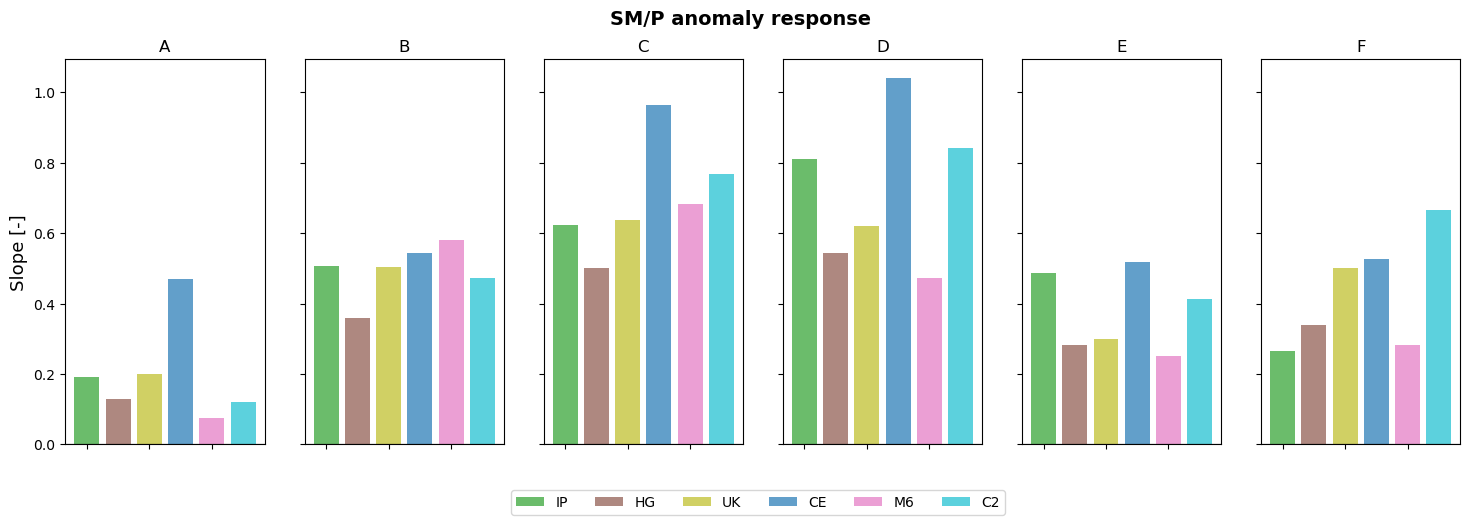

In [7]:
label = ['IP', 'HG' , 'UK' , 'CE' , 'M6' , 'C2']
color = ['C2', 'C5' , 'C8' , 'C10', 'C6' , 'C9']

# LSMs
data = np.zeros((11 , 6))
data[2] = [0.201,0.504 , 0.637 , 0.619 , 0.299 , 0.502]  #UK
data[1] = [0.130,0.359 , 0.502 , 0.543 , 0.282 , 0.339] #HG
data[5] = [0.120,0.472 , 0.769 , 0.842 , 0.412 , 0.665] #C2
data[3] = [0.469,0.544 , 0.963 , 1.041 , 0.519 , 0.526] #CE
data[0] = [0.192,0.506 , 0.622 , 0.810 , 0.488 , 0.265] #IP
data[4] = [0.075,0.581 , 0.684 , 0.472 , 0.250 , 0.282] #M6

loc = ['A' , 'B' , 'C' , 'D' , 'E' , 'F']

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Iterate over the models and plot a bar chart for each location
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([0 , 1 , 2, 3 , 4 , 5] , np.arange(0 , 6 , 1)):
        axs[i]
        axs[i].bar(k, data[:, j][k], alpha=0.7 , color = color[l] , label= label[l])
        axs[i].set_title(f"{loc[i]}")
    

    
plt.legend(ncols = 6 ,  bbox_to_anchor=(-1.25 , -0.1))
    
for ax in axs:
    ax.axhline(y=0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    #ax.text(2.75 , 0.55,  'LSMs')
    #ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

fig.suptitle("SM/P anomaly response", fontsize=14 , fontweight = 'bold')

# Display the plot
plt.show()

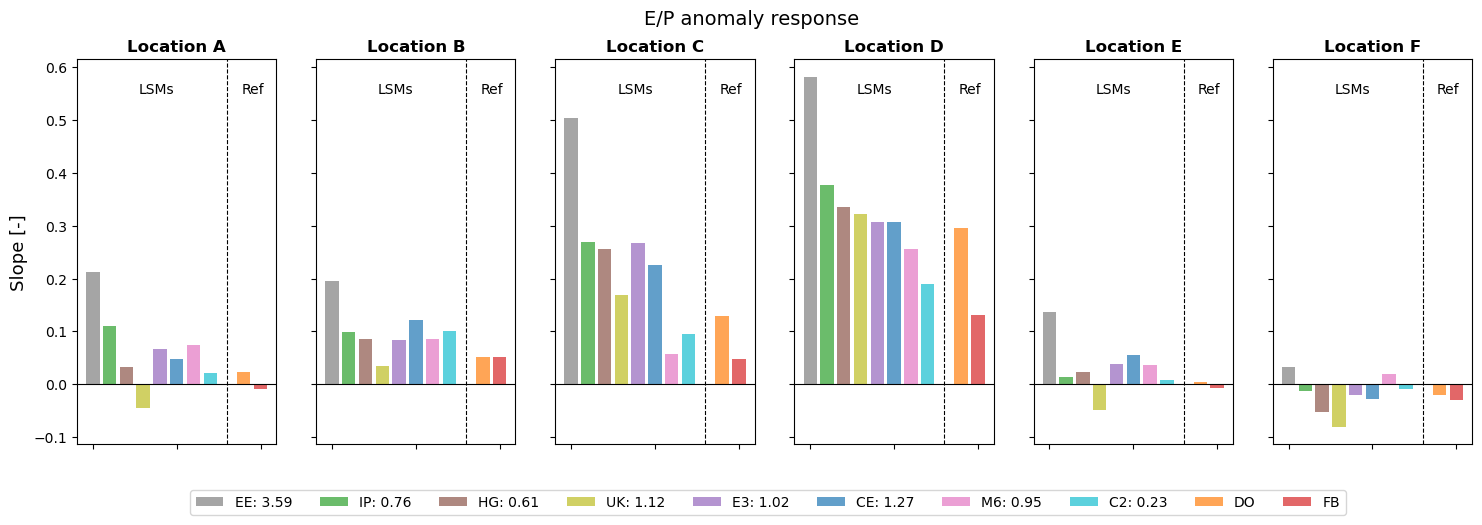

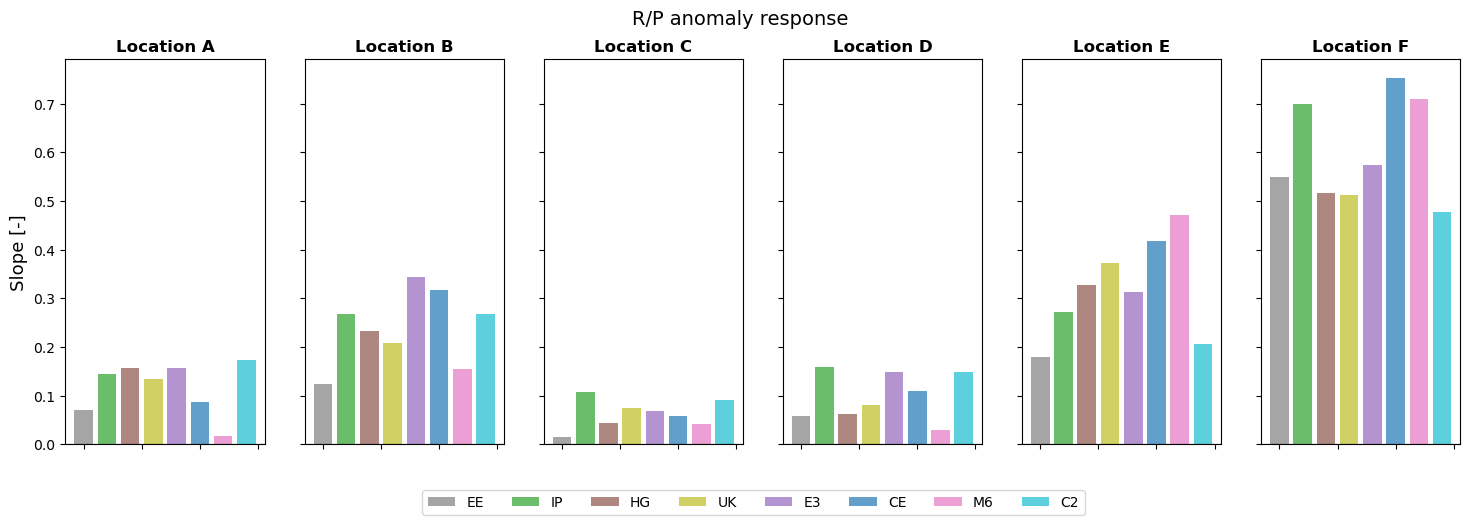

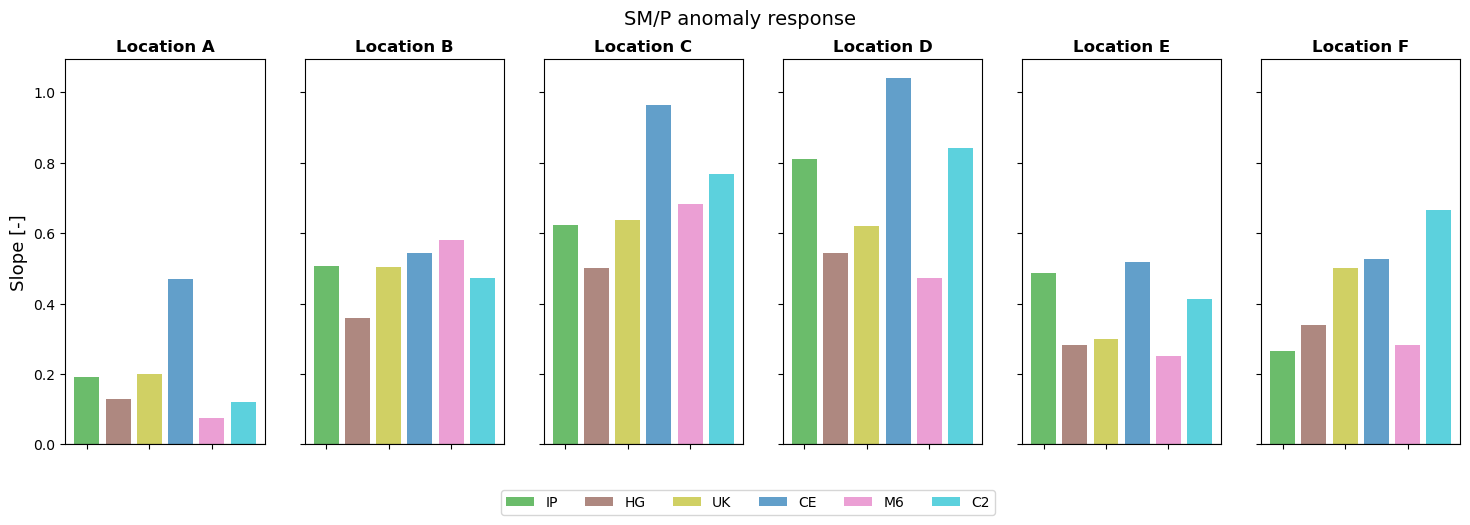

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#label = ['EE', 'IP', 'HG' , 'UK' , 'E3' , 'CE' , 'M6' , 'C2' , 'DO' , 'FB']
color = ['C7', 'C2', 'C5' , 'C8' , 'C4' , 'C10', 'C6' , 'C9' , 'C1' , 'C3']



# LSMs
data = np.zeros((11 , 6))
data[3] = [-0.045 , 0.035 , 0.169 , 0.323 , -0.048 , -0.081]  #UK
data[2] = [0.032 , 0.085 , 0.257 , 0.336 , 0.023 , -0.052] #HG
data[7] = [0.022 , 0.1 , 0.095 , 0.190 , 0.008 , -0.009] #C2
data[5] = [0.048 , 0.121 , 0.225 , 0.307 , 0.056 , -0.028] #CE
data[4] = [0.067 , 0.083 , 0.267 , 0.308 , 0.039 , -0.021] #E3
data[0] = [0.213 , 0.195 , 0.504 , 0.582 , 0.137 , 0.032] # EE
data[1] = [0.111 , 0.098 , 0.270 , 0.377 , 0.014 , -0.013] #IP
data[6] = [0.075 , 0.086 , 0.057 , 0.256 , 0.036 , 0.019] #M6

#Ref E
data[9] = [0.023 , 0.052 , 0.129 , 0.296 , 0.004 , -0.021]
data[10] = [-0.009 , 0.051 , 0.048 , 0.132 , -0.007 , -0.030]

avg_Ref = [(data[9][0] + data[10][0])/2 , (data[9][1] + data[10][1])/2 , (data[9][2] + data[10][2])/2 , (data[9][3] + data[10][3])/2 , (data[9][4] + data[10][4])/2 , (data[9][5] + data[10][5])/2]

MAE = np.zeros((8 , 6)) #Mean relative error

for i in range(8):
    for j in range(6):
        MAE[i][j] = abs((abs(data[i][j]) - abs(avg_Ref[j]))/(abs(avg_Ref[j]))) * 1/6

loc = ['A' , 'B' , 'C' , 'D' , 'E' , 'F']
label = [f'EE: {np.sum(MAE[0])/6:.2f}', f'IP: {np.sum(MAE[1])/6:.2f}', f'HG: {np.sum(MAE[2])/6:.2f}' , 
         f'UK: {np.sum(MAE[3])/6:.2f}' , f'E3: {np.sum(MAE[4])/6:.2f}' , f'CE: {np.sum(MAE[5])/6:.2f}' , 
         f'M6: {np.sum(MAE[6])/6:.2f}' , f'C2: {np.sum(MAE[7])/6:.2f}' , 'DO' , 'FB']

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Iterate over the models and plot a bar chart for each location
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([0 , 1 , 2, 3 , 4 , 5 , 6 , 7 , 9 , 10] , np.arange(0 , 10 , 1)):
        axs[i]
        axs[i].bar(k, data[:, j][k], alpha=0.7 , color = color[l] , label= label[l])
        axs[i].set_title(f"Location {loc[i]}" , fontweight = 'bold')
    

    
plt.legend(ncols = 10, bbox_to_anchor=(0.4 , -0.1))

# Set axis labels and a common y-axis label
#for ax in axs:
    #ax.set_xlabel("Model")
    
for ax in axs:
    ax.axvline(x=8, color='black', linestyle='--' , linewidth = 0.8)
    ax.axhline(y=0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    ax.text(2.75 , 0.55,  'LSMs')
    ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

# Add a main title to the figure
fig.suptitle("E/P anomaly response", fontsize=14)

# Display the plot
plt.show()

label = ['EE', 'IP', 'HG' , 'UK' , 'E3' , 'CE' , 'M6' , 'C2']
color = ['C7', 'C2', 'C5' , 'C8' , 'C4' , 'C10', 'C6' , 'C9']

# LSMs
data_R = np.zeros((8 , 6))
data_R[3] = [0.135 , 0.208 , 0.074 , 0.080 , 0.372 , 0.512]  #UK
data_R[2] = [0.158 , 0.234 , 0.045 , 0.063 , 0.327 , 0.517] #HG
data_R[7] = [0.173 , 0.267 , 0.091 , 0.148 , 0.206 , 0.477] #C2
data_R[5] = [0.088 , 0.317 , 0.059 , 0.110 , 0.417 , 0.753] #CE
data_R[4] = [0.158 , 0.343 , 0.069 , 0.149 , 0.313 , 0.574] #E3
data_R[0] = [0.071 , 0.125 , 0.016 , 0.058 , 0.180 , 0.549] # EE
data_R[1] = [0.144 , 0.267 , 0.107 , 0.159 , 0.272 , 0.699] #IP
data_R[6] = [0.017 , 0.155 , 0.042 , 0.029 , 0.472 , 0.710] #M6

loc = ['A' , 'B' , 'C' , 'D' , 'E' , 'F']

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Iterate over the models and plot a bar chart for each location
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([0 , 1 , 2, 3 , 4 , 5 , 6 , 7] , np.arange(0 , 8 , 1)):
        axs[i]
        axs[i].bar(k, data_R[:, j][k], alpha=0.7 , color = color[l] , label= label[l])
        axs[i].set_title(f"Location {loc[i]}" , fontweight = 'bold')
    

    
plt.legend(ncols = 8 ,  bbox_to_anchor=(-0.85 , -0.1))

# Set axis labels and a common y-axis label
#for ax in axs:
    #ax.set_xlabel("Model")
    
for ax in axs:
    ax.axhline(y=0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    #ax.text(2.75 , 0.55,  'LSMs')
    #ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

# Add a main title to the figure
fig.suptitle("R/P anomaly response", fontsize=14)

# Display the plot
plt.show()

label = ['IP', 'HG' , 'UK' , 'CE' , 'M6' , 'C2']
color = ['C2', 'C5' , 'C8' , 'C10', 'C6' , 'C9']

# LSMs
data_SM = np.zeros((6 , 6))
data_SM[2] = [0.201,0.504 , 0.637 , 0.619 , 0.299 , 0.502]  #UK
data_SM[1] = [0.130,0.359 , 0.502 , 0.543 , 0.282 , 0.339] #HG
data_SM[5] = [0.120,0.472 , 0.769 , 0.842 , 0.412 , 0.665] #C2
data_SM[3] = [0.469,0.544 , 0.963 , 1.041 , 0.519 , 0.526] #CE
data_SM[0] = [0.192,0.506 , 0.622 , 0.810 , 0.488 , 0.265] #IP
data_SM[4] = [0.075,0.581 , 0.684 , 0.472 , 0.250 , 0.282] #M6

loc = ['A' , 'B' , 'C' , 'D' , 'E' , 'F']

# Create a figure with 6 subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 5), sharey=True)

# Iterate over the models and plot a bar chart for each location
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([0 , 1 , 2, 3 , 4 , 5] , np.arange(0 , 6 , 1)):
        axs[i]
        axs[i].bar(k, data_SM[:, j][k], alpha=0.7 , color = color[l] , label= label[l])
        axs[i].set_title(f"Location {loc[i]}" , fontweight = 'bold')
    

    
plt.legend(ncols = 6 ,  bbox_to_anchor=(-1.3 , -0.1))

# Set axis labels and a common y-axis label
#for ax in axs:
    #ax.set_xlabel("Model")
    
for ax in axs:
    ax.axhline(y=0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    #ax.text(2.75 , 0.55,  'LSMs')
    #ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

# Add a main title to the figure
fig.suptitle("SM/P anomaly response", fontsize=14)

# Display the plot
plt.show()

In [9]:
# LSMs
data_SM = np.zeros((8 , 6))
data_SM[3] = [0.201,0.504 , 0.637 , 0.619 , 0.299 , 0.502] #UK
data_SM[2] = [0.130,0.359 , 0.502 , 0.543 , 0.282 , 0.339] #HG
data_SM[7] = [0.120,0.472 , 0.769 , 0.842 , 0.412 , 0.665] #C2
data_SM[5] = [0.469,0.544 , 0.963 , 1.041 , 0.519 , 0.526] #CE
data_SM[0] = [0 , 0 , 0, 0 ,0 , 0]                         #EE (No data)
data_SM[1] = [0.192,0.506 , 0.622 , 0.810 , 0.488 , 0.265] #IP
data_SM[4] = [0 , 0 , 0, 0 ,0 , 0]                         #E3 (No data)
data_SM[6] = [0.075,0.581 , 0.684 , 0.472 , 0.250 , 0.282] #M6


Data_T = data[0 : 8] + data_R + data_SM

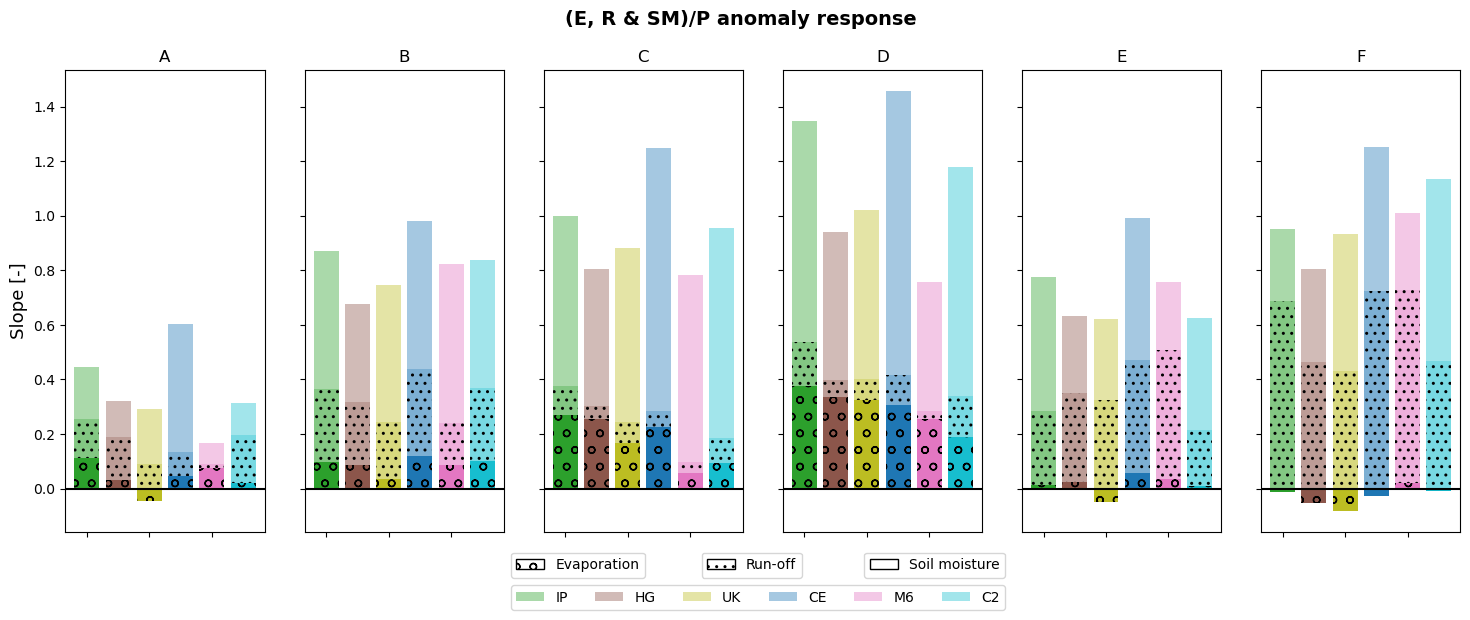

In [30]:
from matplotlib.patches import Patch

label2 = ['IP_R', 'HG_R' , 'UK_R' , 'CE_R' , 'M6_R' , 'C2_R']
label1 = ['IP', 'HG' , 'UK' , 'CE' , 'M6' , 'C2']
label3 = ['IP_E', 'HG_E' , 'UK_E' , 'CE_E' , 'M6_E' , 'C2_E']


color = [ 'C2', 'C5' , 'C8', 'C10', 'C6' , 'C9']

hatches1 = ['..', '..', '..', '..', '..', '..', '..', '..']
hatches2 = ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o']

fig, axs = plt.subplots(1, 6, figsize=(18, 6), sharey=True)

for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([1 , 2, 3 , 5 , 6 , 7] , np.arange(0 , 6 , 1)):
        axs[i]
        axs[i].bar(l, data[0:8][:, j][k] + data_R[:, j][k] + data_SM[:, j][k], alpha=0.4 , color = color[l] , label= label1[l])
        axs[i].set_title(f"{loc[i]}")
        
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([1 , 2, 3 , 5 , 6 , 7] , np.arange(0 , 6 , 1)):
        axs[i]
        axs[i].bar(l, data[0:8][:, j][k] + data_R[:, j][k], alpha=0.3 , color = color[l]  , hatch=hatches1[l])
        

        
for i,j in zip([0 , 1  , 2 , 3 , 4 , 5] , [0 , 1 , 2 , 3 , 4 , 5]):
    for k,l in zip([1 , 2, 3 , 5 , 6 , 7] , np.arange(0 , 6 , 1)):
        axs[i]
        axs[i].bar(l, data[0:8][:, j][k], alpha=1.0 , color = color[l] , hatch=hatches2[l])
        
h1 = Patch(facecolor='white', edgecolor='black', hatch=hatches1[0])
h2 = Patch(facecolor='white', edgecolor='black', hatch=hatches2[0])
h3 = Patch(facecolor='white', edgecolor='black', hatch=None)

legend1 = plt.legend(handles=[h3], labels=['Soil moisture'], bbox_to_anchor=(-1.25 , -0.03))
legend2 = plt.legend(handles=[h1], labels=['Run-off'], bbox_to_anchor=(-2.27 , -0.03))
legend3 = plt.legend(handles=[h2], labels=['Evaporation'], bbox_to_anchor=(-3.058 , -0.03))

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
    
plt.legend(ncols = 6 ,  bbox_to_anchor=(-1.25 , -0.1))

for ax in axs:
    ax.axhline(y=0, color='black' , linewidth =1.5)
    #ax.axhline(y=1.0, color='black' , linewidth =0.8)
    ax.set_xticklabels([])
    #ax.text(2.75 , 0.55,  'LSMs')
    #ax.text(8.85 , 0.55 , 'Ref')
    
axs[0].set_ylabel("Slope [-]" , fontsize = 13)

fig.suptitle("(E, R & SM)/P anomaly response", fontsize=14 , fontweight = 'bold')

plt.show()